In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
%pip install graphviz
import graphviz

  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Load your data (replace 'bank.csv' with your actual file path if different)
bank_data = pd.read_csv('bank-marketing.csv', delimiter=';')

bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [3]:
# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
# ...existing code...
# One-hot encode categorical columns
X = pd.get_dummies(X)

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
# ...existing code...

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
y_pred=model.predict(X_test)

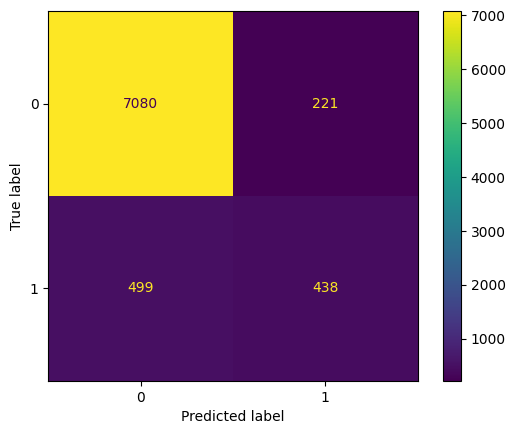

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Outcome=["0","1"]
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Outcome)
display.plot()

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision=precision_score(y_test, y_pred)
print("Precision:", precision)
Recall=recall_score(y_test, y_pred)
print("Recall:", Recall)
f1_score = 2 * (precision * Recall) / (precision + Recall)
print("F1 Score:", f1_score)

Accuracy: 0.9126001456664239
Precision: 0.6646433990895296
Recall: 0.46744930629669157
F1 Score: 0.548872180451128


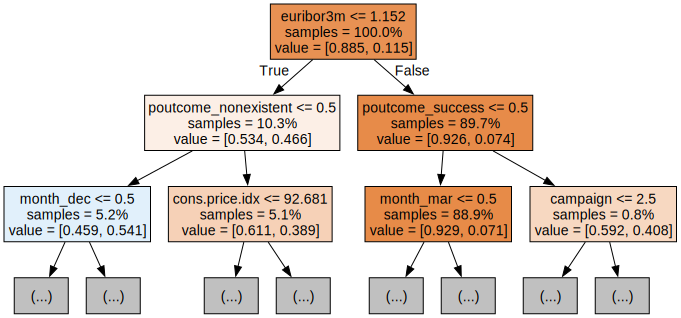

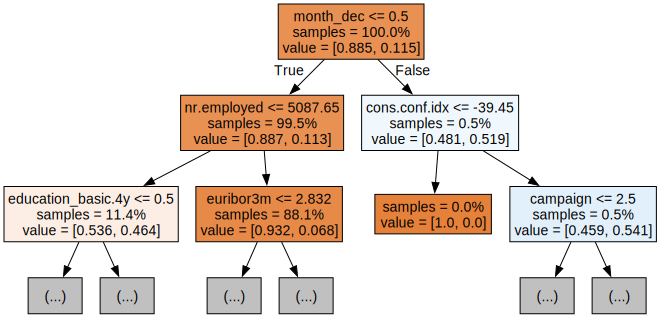

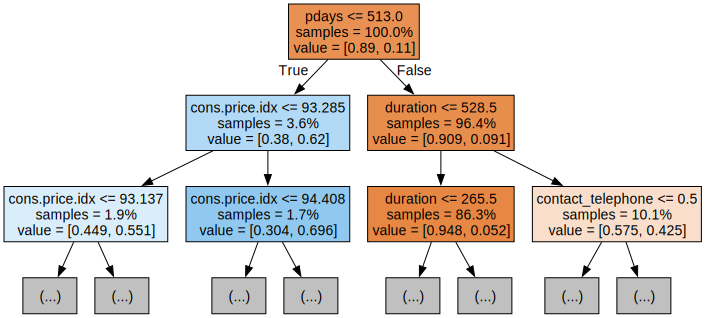

In [9]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    from IPython.display import display as ipy_display
    ipy_display(graph)